In [146]:
import pandas as pd
import numpy as np
% matplotlib inline
import matplotlib.pyplot as plt

In [147]:
df = pd.read_csv("../data/spi_matches.csv", parse_dates=["date"])

In [148]:
len(df)

21126

In [141]:
df_fra_pred = df[(df.score1.isnull()) & (df.league == "French Ligue 1") & (df.probtie > 0.31)]
df_fra_pred

,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,probtie,...,importance1,importance2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2
18104,2019-02-09,1843,French Ligue 1,Amiens,Caen,51.91,51.70,0.4400,0.2478,0.3122,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18344,2019-02-16,1843,French Ligue 1,Angers,Nice,58.31,63.22,0.3936,0.2956,0.3108,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18594,2019-02-23,1843,French Ligue 1,Amiens,Nice,51.91,63.22,0.3283,0.3522,0.3195,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18843,2019-03-02,1843,French Ligue 1,Bordeaux,Montpellier,61.33,65.99,0.3970,0.2878,0.3152,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19352,2019-03-16,1843,French Ligue 1,Reims,Nantes,57.79,64.57,0.3711,0.3157,0.3132,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19857,2019-04-06,1843,French Ligue 1,Nice,Montpellier,63.22,65.99,0.4101,0.2646,0.3253,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20856,2019-05-11,1843,French Ligue 1,Caen,Reims,51.70,57.79,0.3806,0.3032,0.3162,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20975,2019-05-18,1843,French Ligue 1,Montpellier,Nantes,65.99,64.57,0.4499,0.2358,0.3142,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_prem_pred = df[(df.score1.isnull()) & (df.league == "Barclays Premier League") & (df.probtie > 0.3)]
df_prem_pred

,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,probtie,...,importance1,importance2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2
17738,2019-01-29,2411,Barclays Premier League,Huddersfield Town,Everton,58.79,70.97,0.3073,0.3890,0.3037,...,16.7,1.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18539,2019-02-23,2411,Barclays Premier League,Newcastle,Huddersfield Town,64.47,58.79,0.4972,0.1939,0.3089,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18716,2019-02-26,2411,Barclays Premier League,Huddersfield Town,Wolverhampton,58.79,68.51,0.3208,0.3610,0.3183,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18817,2019-03-02,2411,Barclays Premier League,Brighton and Hove Albion,Huddersfield Town,63.02,58.79,0.4830,0.2050,0.3120,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19785,2019-04-06,2411,Barclays Premier League,Huddersfield Town,Leicester City,58.79,69.87,0.3067,0.3804,0.3128,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19818,2019-04-06,2411,Barclays Premier League,Newcastle,Crystal Palace,64.47,71.31,0.3601,0.3371,0.3028,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20472,2019-04-27,2411,Barclays Premier League,Brighton and Hove Albion,Newcastle,63.02,64.47,0.4194,0.2735,0.3071,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df_rus_pred = df[(df.score1.isnull()) & (df.league == "Russian Premier Liga") & (df.probtie > 0.337)]
df_rus_pred

,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,probtie,...,importance1,importance2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2
18886,2019-03-03,1866,Russian Premier Liga,FC Ufa,Dinamo Moscow,47.52,54.81,0.3716,0.2671,0.3614,...,39.8,7.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18887,2019-03-03,1866,Russian Premier Liga,Rubin Kazan,Terek Grozny,55.98,50.90,0.4788,0.1825,0.3386,...,22.6,5.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19384,2019-03-17,1866,Russian Premier Liga,FC Ufa,Terek Grozny,47.52,50.90,0.3739,0.2641,0.3620,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19385,2019-03-17,1866,Russian Premier Liga,Rubin Kazan,Rostov,55.98,52.69,0.4297,0.1918,0.3785,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19894,2019-04-07,1866,Russian Premier Liga,FC Ufa,Rostov,47.52,52.69,0.3465,0.2573,0.3962,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20290,2019-04-21,1866,Russian Premier Liga,Gazovik Orenburg,Rostov,50.05,52.69,0.3827,0.2580,0.3593,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20397,2019-04-23,1866,Russian Premier Liga,Rubin Kazan,FC Ufa,55.98,47.52,0.4912,0.1667,0.3421,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20538,2019-04-28,1866,Russian Premier Liga,Dinamo Moscow,Terek Grozny,54.81,50.90,0.4492,0.2078,0.3430,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20539,2019-04-28,1866,Russian Premier Liga,Anzhi Makhachkala,Rostov,34.64,52.69,0.2426,0.4009,0.3565,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20868,2019-05-12,1866,Russian Premier Liga,Dinamo Moscow,Rostov,54.81,52.69,0.4194,0.2027,0.3780,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df_italy_b_pred = df[(df.score1.isnull()) & (df.league == "Italy Serie B") & (df.probtie > 0.33)]
df_italy_b_pred

,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,probtie,...,importance1,importance2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2
17815,2019-02-02,1856,Italy Serie B,Cosenza,Cittadella,22.18,32.63,0.3029,0.3632,0.3339,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18377,2019-02-17,1856,Italy Serie B,Cosenza,Cremonese,22.18,26.15,0.3642,0.2927,0.3431,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18521,2019-02-23,1856,Italy Serie B,Cremonese,Ascoli,26.15,23.65,0.4399,0.2250,0.3350,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18690,2019-02-24,1856,Italy Serie B,Livorno,F.B.C Unione Venezia,21.60,25.20,0.3669,0.2988,0.3342,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18835,2019-03-02,1856,Italy Serie B,Carpi,Ascoli,17.56,23.65,0.3339,0.3307,0.3355,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19337,2019-03-16,1856,Italy Serie B,F.B.C Unione Venezia,Cremonese,25.20,26.15,0.3997,0.2584,0.3419,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19598,2019-03-30,1856,Italy Serie B,Ascoli,Benevento,23.65,30.58,0.3441,0.3255,0.3304,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19701,2019-04-02,1856,Italy Serie B,F.B.C Unione Venezia,Cittadella,25.20,32.63,0.3364,0.3255,0.3381,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19703,2019-04-02,1856,Italy Serie B,Livorno,Cremonese,21.60,26.15,0.3567,0.3094,0.3339,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20387,2019-04-22,1856,Italy Serie B,Ascoli,F.B.C Unione Venezia,23.65,25.20,0.3920,0.2649,0.3431,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
len(df)

21126

In [71]:
df = df[~df.score1.isnull()]

In [72]:
len(df)

17517

In [77]:
def q1(x):
    return x.quantile(0.95)

In [78]:
percentile_by_league = df.groupby("league").agg({"probtie": q1}).reset_index()

In [79]:
percent_dict = percentile_by_league.set_index("league").T.to_dict(orient="records")[0]

In [80]:
percent_dict

{'Argentina Primera Division': 0.32114,
 'Australian A-League': 0.25325,
 'Austrian T-Mobile Bundesliga': 0.289365,
 'Barclays Premier League': 0.30042,
 'Belgian Jupiler League': 0.28256999999999993,
 'Brasileiro Série A': 0.2931,
 'Chinese Super League': 0.29972,
 'Danish SAS-Ligaen': 0.30017999999999995,
 'Dutch Eredivisie': 0.29332499999999995,
 'English League Championship': 0.30289,
 'English League One': 0.30268,
 'English League Two': 0.2961599999999999,
 'French Ligue 1': 0.31567999999999996,
 'French Ligue 2': 0.3361099999999999,
 'German 2. Bundesliga': 0.3151,
 'German Bundesliga': 0.2935,
 'Greek Super League': 0.30435,
 'Italy Serie A': 0.30488,
 'Italy Serie B': 0.34941999999999995,
 'Japanese J League': 0.28462,
 'Major League Soccer': 0.27541,
 'Mexican Primera Division Torneo Apertura': 0.30787499999999995,
 'Mexican Primera Division Torneo Clausura': 0.30804,
 "National Women's Soccer League": 0.29910000000000003,
 'Norwegian Tippeligaen': 0.2794,
 'Portuguese Liga':

In [81]:
df["league_95_percentile"] = df.league.map(percent_dict)

In [83]:
df["prob_draw_over_95_percentile"] = df.apply(
    lambda row: 1 if row.probtie > row.league_95_percentile else 0,
    axis=1)

In [84]:
df_pred = df[df.prob_draw_over_95_percentile == 1]

In [85]:
df_pred.loc[:, "success"] = df_pred.apply(lambda row: 1 if row.resul  t == "D" else 0, axis=1)

/home/alexander/anaconda/envs/py36/lib/python3.6/site-packages/pandas/core/indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/alexander/anaconda/envs/py36/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [86]:
df_draw_by_league = df_pred.groupby("league").agg({"success": ["sum", "count"]}).reset_index()
df_draw_by_league.columns = df_draw_by_league.columns.droplevel()
df_draw_by_league.columns = ["league", "correct", "total"]
df_draw_by_league["accuracy"] = df_draw_by_league.correct / df_draw_by_league.total
df_draw_by_league.sort_values("accuracy", ascending=False)

,league,correct,total,accuracy
7,Danish SAS-Ligaen,4,7,0.571429
26,Russian Premier Liga,9,19,0.473684
30,Spanish Segunda Division,16,36,0.444444
3,Barclays Premier League,22,50,0.440000
18,Italy Serie B,14,33,0.424242
2,Austrian T-Mobile Bundesliga,6,15,0.400000
22,Mexican Primera Division Torneo Clausura,7,18,0.388889
12,French Ligue 1,19,49,0.387755
0,Argentina Primera Division,11,29,0.379310
31,Swedish Allsvenskan,9,24,0.375000


In [185]:
df_prem = df[df.league == "Barclays Premier League"]

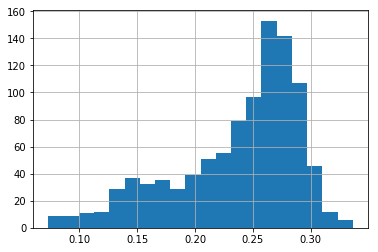

In [186]:
df_prem.probtie.hist(bins=20)

In [187]:
df_prem.probtie.quantile(0.95)

0.30042

# Premmy

In [188]:
betting = pd.concat([pd.read_csv("../data/1617_results.csv", parse_dates=["Date"], dayfirst=True),
                      pd.read_csv("../data/1718_results.csv", parse_dates=["Date"], dayfirst=True),
                      pd.read_csv("../data/1819_results.csv", parse_dates=["Date"], dayfirst=True)])

/Users/alexandergreen/anaconda/envs/oa_env/lib/python3.6/site-packages/ipykernel/__main__.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  app.launch_new_instance()


In [189]:
bet_teams = betting.HomeTeam.unique()
sorted(bet_teams)

['Arsenal',
 'Bournemouth',
 'Brighton',
 'Burnley',
 'Cardiff',
 'Chelsea',
 'Crystal Palace',
 'Everton',
 'Fulham',
 'Huddersfield',
 'Hull',
 'Leicester',
 'Liverpool',
 'Man City',
 'Man United',
 'Middlesbrough',
 'Newcastle',
 'Southampton',
 'Stoke',
 'Sunderland',
 'Swansea',
 'Tottenham',
 'Watford',
 'West Brom',
 'West Ham',
 'Wolves']

In [190]:
five38_teams_16 = df_prem.team1.unique()
sorted(five38_teams_16)

['AFC Bournemouth',
 'Arsenal',
 'Brighton and Hove Albion',
 'Burnley',
 'Cardiff City',
 'Chelsea',
 'Crystal Palace',
 'Everton',
 'Fulham',
 'Huddersfield Town',
 'Hull City',
 'Leicester City',
 'Liverpool',
 'Manchester City',
 'Manchester United',
 'Middlesbrough',
 'Newcastle',
 'Southampton',
 'Stoke City',
 'Sunderland',
 'Swansea City',
 'Tottenham Hotspur',
 'Watford',
 'West Bromwich Albion',
 'West Ham United',
 'Wolverhampton']

In [191]:
team_dict = {"AFC Bournemouth": "Bournemouth",
            "Brighton and Hove Albion": "Brighton",
            "Cardiff City": "Cardiff",
            "Huddersfield Town": "Huddersfield",
            "Hull City": "Hull",
            "Leicester City": "Leicester",
            "Manchester United": "Man United",
            "Manchester City": "Man City",
            "Newcastle United": "Newcastle",
            "Stoke City": "Stoke",
            "Swansea City": "Swansea",
            "Tottenham Hotspur": "Tottenham",
            "West Bromwich Albion": "West Brom",
            "West Ham United": "West Ham",
            "Wolverhampton": "Wolves"}

In [192]:
df_prem.loc[:, "team1"] = df_prem.team1.apply(lambda x: team_dict[x] if x in team_dict.keys() else x)

df_prem.loc[:, "team2"] = df_prem.team2.apply((lambda x: team_dict[x] if x in team_dict.keys() else x))

/Users/alexandergreen/anaconda/envs/oa_env/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [194]:
betting.rename(columns={"HomeTeam": "team1", "AwayTeam": "team2", "Date": "date"}, inplace=True)

In [195]:
merged = pd.merge(betting, df_prem, on=["date", "team1", "team2"])

In [196]:
merged = merged[["team1", "team2", 
                 "BbMxH", "BbMxD", "BbMxA",
                "PSH", "PSD", "PSA", 
                "result", 
                "prob1", "prob2", "probtie"]]

money at end £7736.6978947632
total matches 48
lowest bank £968.25847822515
highest bank £11791.94923756013
ROI 32.0%
Percent of matches bet on 4.85


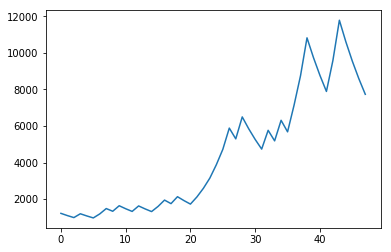

In [237]:
money_history = []
money = 1000
frac = 0.1
total_staked = 0
total_won = 0
odds = []
lose_odds = []
for row in merged.itertuples():
    if row.probtie >= 0.30:
        stake = frac * money
        money -= stake
        total_staked += stake
        if row.result == "D":
            money += stake * row.BbMxD * 0.99
            total_won += stake * row.BbMxD * 0.99
            odds.append(row.BbMxD)
        else:
            lose_odds.append(row.BbMxD)
        money_history.append(money)
plt.plot(money_history)
print("money at end £{}".format(money))
print("total matches {}".format(len(money_history)))
print("lowest bank £{}".format(min(money_history)))
print("highest bank £{}".format(max(money_history)))
print("ROI {}%".format(round(100 * ((total_won / total_staked) - 1), 0)))
print("Percent of matches bet on {}".format(round(len(money_history) * 100 / len(df_prem), 2)))

In [198]:
np.mean(odds)

3.2900000000000005

In [199]:
np.mean(lose_odds)

3.3388000000000004

In [200]:
len(lose_odds)

25

In [201]:
len(odds)

23

# everything

money at end £915.7916435628018
total matches 324
lowest bank £215.59427154885327
highest bank £12736.579211067696
ROI -0.0%


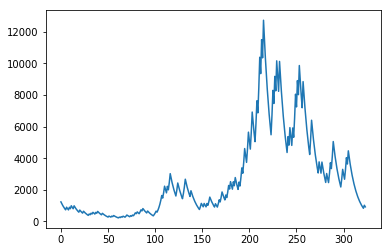

In [202]:
money_history = []
money = 1000
frac = 0.1
total_staked = 0
total_won = 0
for row in df.itertuples():
    if row.probtie >= 0.33:
        stake = frac * money
        money -= stake
        total_staked += stake
        if row.result == "D":
            money += stake * 3.3
            total_won += stake * 3.3
        money_history.append(money)
plt.plot(money_history)
print("money at end £{}".format(money))
print("total matches {}".format(len(money_history)))
print("lowest bank £{}".format(min(money_history)))
print("highest bank £{}".format(max(money_history)))
print("ROI {}%".format(100 * (round((total_won / total_staked) - 1, 2))))
    

# Serie B

In [88]:
betting_serieb = pd.concat([pd.read_csv("../data/serieb_1718.csv", parse_dates=["Date"], dayfirst=True),
                            pd.read_csv("../data/serieb_1819.csv", parse_dates=["Date"], dayfirst=True)])

In [89]:
df_italy_b = df[df.league == "Italy Serie B"]
df_italy_b.team1.unique()

array(['Parma', 'Virtus Entella', 'Avellino', 'Ternana', 'Carpi',
       'Palermo', 'F.B.C Unione Venezia', 'Pro Vercelli', 'Cittadella',
       'US Pescara', 'Bari', 'Brescia', 'Empoli', 'Novara', 'Frosinone',
       'Cremonese', 'Perugia', 'Spezia', 'Cesena', 'Foggia', 'Ascoli',
       'Salernitana', 'Verona', 'Benevento', 'Padova', 'Lecce', 'Crotone',
       'Livorno', 'Cosenza'], dtype=object)

In [90]:
betting_serieb.HomeTeam.unique()

array(['Parma', 'Avellino', 'Carpi', 'Cittadella', 'Palermo',
       'Pro Vercelli', 'Ternana', 'Venezia', 'Virtus Entella', 'Pescara',
       'Bari', 'Brescia', 'Ascoli', 'Cesena', 'Cremonese', 'Empoli',
       'Foggia', 'Frosinone', 'Novara', 'Perugia', 'Spezia',
       'Salernitana', 'Verona', 'Benevento', 'Padova', 'Crotone', 'Lecce',
       'Livorno', 'Cosenza'], dtype=object)

In [91]:
np.setdiff1d(betting_serieb.HomeTeam.unique(), df_italy_b.team1.unique())

array(['Pescara', 'Venezia'], dtype=object)

In [92]:
np.setdiff1d(df_italy_b.team1.unique(), betting_serieb.HomeTeam.unique())

array(['F.B.C Unione Venezia', 'US Pescara'], dtype=object)

In [93]:
serie_b_team_dict = {
    "Venezia": "F.B.C Unione Venezia",
    "Pescara": "US Pescara"
}

In [94]:
df_italy_b.loc[:, "team1"] = df_italy_b.team1.apply(lambda x: team_dict[x] if x in serie_b_team_dict.keys() else x)

df_italy_b.loc[:, "team2"] = df_italy_b.team2.apply(lambda x: team_dict[x] if x in serie_b_team_dict.keys() else x)

/home/alexander/anaconda/envs/py36/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [96]:
betting_serieb.rename(columns={"HomeTeam": "team1", "AwayTeam": "team2", "Date": "date"}, inplace=True)

In [97]:
merged_serie_b = pd.merge(betting_serieb, df_italy_b, on=["date", "team1", "team2"])

In [98]:
merged_serie_b = merged_serie_b[["team1", "team2", 
                                 "BbMxH", "BbMxD", "BbMxA",
                                 "PSH", "PSD", "PSA", 
                                 "result", 
                                 "prob1", "prob2", "probtie"]]

In [99]:
df_italy_b.probtie.quantile(0.95)

0.34941999999999995

money at end £648.7070682053873
total matches 106
lowest bank £358.6656716169754
highest bank £1744.9213350364184
ROI -4.0%
Percent of matches bet on 16.33


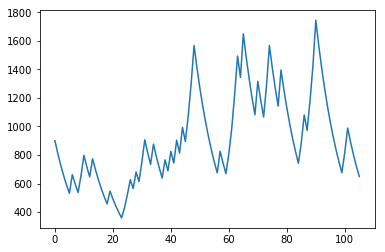

In [103]:
money_history = []
money = 1000
frac = 0.1
total_staked = 0
total_won = 0
for row in merged_serie_b.itertuples():
    if row.probtie >= 0.32:
        stake = frac * money
        money -= stake
        total_staked += stake
        if row.result == "D":
            money += stake * row.BbMxD * 0.99
            total_won += stake * row.BbMxD * 0.99
        money_history.append(money)
plt.plot(money_history)
print("money at end £{}".format(money))
print("total matches {}".format(len(money_history)))
print("lowest bank £{}".format(min(money_history)))
print("highest bank £{}".format(max(money_history)))
print("ROI {}%".format(100 * (round((total_won / total_staked) - 1, 2))))
print("Percent of matches bet on {}".format(round(len(money_history) * 100 / len(df_italy_b), 2)))

# Russian 

In [92]:
df_rus = df[df.league == "Russian Premier Liga"]
df_rus.probtie.quantile(0.95)

0.33679000000000003

money at end £3036.7153889320425
total matches 28
lowest bank £723.6153800099999
highest bank £3374.128209924492
ROI 56.00000000000001%
Percent of matches bet on 7.47


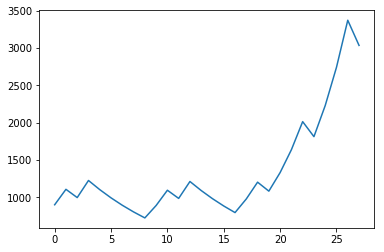

In [93]:
money_history = []
money = 1000
frac = 0.1
total_staked = 0
total_won = 0
for row in df_rus.itertuples():
    if row.probtie >= 0.33:
        stake = frac * money
        money -= stake
        total_staked += stake
        if row.result == "D":
            money += stake * 3.3
            total_won += stake * 3.3
        money_history.append(money)
plt.plot(money_history)
print("money at end £{}".format(money))
print("total matches {}".format(len(money_history)))
print("lowest bank £{}".format(min(money_history)))
print("highest bank £{}".format(max(money_history)))
print("ROI {}%".format(100 * (round((total_won / total_staked) - 1, 2))))
print("Percent of matches bet on {}".format(round(len(money_history) * 100 / len(df_rus), 2)))

# Ligue1

In [106]:
betting_fra1 = pd.concat([pd.read_csv("../data/ligue1_1617.csv", parse_dates=["Date"], dayfirst=True),
                          pd.read_csv("../data/ligue1_1718.csv", parse_dates=["Date"], dayfirst=True),
                          pd.read_csv("../data/ligue1_1819.csv", parse_dates=["Date"], dayfirst=True)])

In [120]:
df_fra = df[df.league == "French Ligue 1"]


In [125]:
np.setdiff1d(df_fra.team1.unique(), betting_fra1.HomeTeam.unique())

array([], dtype=object)

In [126]:
np.setdiff1d(betting_fra1.HomeTeam.unique(), df_fra.team1.unique())

array([], dtype=object)

In [123]:
fra_dict = {
    "AS Monaco": "Monaco",
    "AS Nancy Lorraine": "Nancy",
    "Dijon FCO": "Dijon",
    "Paris Saint-Germain": "Paris SG",
    "Stade Rennes": "Rennes"
}

In [124]:
df_fra.loc[:, "team1"] = df_fra.team1.apply(lambda x: fra_dict[x] if x in fra_dict.keys() else x)

df_fra.loc[:, "team2"] = df_fra.team2.apply(lambda x: fra_dict[x] if x in fra_dict.keys() else x)

/home/alexander/anaconda/envs/py36/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [127]:
betting_fra1.rename(columns={"HomeTeam": "team1", "AwayTeam": "team2", "Date": "date"}, inplace=True)

In [128]:
merged_fra = pd.merge(betting_fra1, df_fra, on=["date", "team1", "team2"])

In [129]:
merged_fra = merged_fra[["team1", "team2", 
                                 "BbMxH", "BbMxD", "BbMxA",
                                 "PSH", "PSD", "PSA", 
                                 "result", 
                                 "prob1", "prob2", "probtie"]]

In [130]:
df_fra.probtie.quantile(0.95)

0.31567999999999996

money at end £3277.3415754683106
total matches 89
lowest bank £695.2752812058917
highest bank £3701.130157317757
ROI 15.0%
Percent of matches bet on 9.22


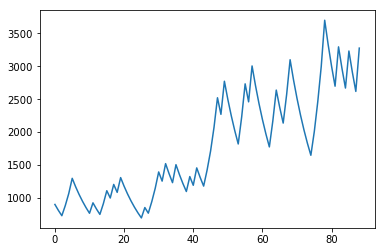

In [183]:

money_history = []
money = 1000
frac = 0.1
total_staked = 0
total_won = 0
for row in merged_fra.itertuples():
    if row.probtie >= 0.31:
        stake = frac * money
        money -= stake
        total_staked += stake
        if row.result == "D":
            money += stake * row.BbMxD * 0.99
            total_won += stake * row.BbMxD * 0.99
        money_history.append(money)
plt.plot(money_history)
print("money at end £{}".format(money))
print("total matches {}".format(len(money_history)))
print("lowest bank £{}".format(min(money_history)))
print("highest bank £{}".format(max(money_history)))
print("ROI {}%".format(100 * (round((total_won / total_staked) - 1, 2))))
print("Percent of matches bet on {}".format(round(len(money_history) * 100 / len(df_fra), 2)))

# spanish segunda division

In [172]:
df_spa2 = df[df.league == "Spanish Segunda Division"]
df_spa2.date.min()

Timestamp('2017-08-18 00:00:00')

In [173]:
betting_spa2 = pd.concat([
                          pd.read_csv("../data/spa2_1718.csv", parse_dates=["Date"], dayfirst=True),
                          pd.read_csv("../data/spa2_1819.csv", parse_dates=["Date"], dayfirst=True)])

In [174]:
np.setdiff1d(df_spa2.team1.unique(), betting_spa2.HomeTeam.unique())

array(['AD Alcorcon', 'Cultural Leonesa', 'Deportivo La Coruña',
       'FC Barcelona II', 'Gimnástic Tarragona', 'La Hoya Lorca',
       'Málaga', 'Rayo Vallecano', 'Real Oviedo', 'Real Valladolid',
       'Real Zaragoza', 'SD Huesca', 'Sevilla Atletico', 'Sporting Gijón'],
      dtype=object)

In [175]:
np.setdiff1d(betting_spa2.HomeTeam.unique(), df_spa2.team1.unique())

array(['Alcorcon', 'Barcelona B', 'Gimnastic', 'Huesca', 'La Coruna',
       'Leonesa', 'Lorca', 'Malaga', 'Oviedo', 'Sevilla B', 'Sp Gijon',
       'Valladolid', 'Vallecano', 'Zaragoza'], dtype=object)

In [176]:
spa_dict = {
    "AD Alcorcon": "Alcorcon",
    "Cultural Leonesa": "Leonesa",
    "Deportivo La Coruña": "La Coruna",
    "FC Barcelona II": "Barcelona B",
    "Gimnástic Tarragona": "Gimnastic",
    "La Hoya Lorca": "Lorca",
    "Málaga": "Malaga",
    "Real Oviedo": "Oviedo",
    "Real Valladolid": "Valladolid",
    "Real Zaragoza":"Zaragoza",
    "SD Huesca": "Huesca",
    "Sevilla Atletico": "Sevilla B",
    "Sporting Gijón": "Sp Gijon",
    "Rayo Vallecano": "Vallecano"
}

In [177]:
df_spa2.loc[:, "team1"] = df_spa2.team1.apply(lambda x: spa_dict[x] if x in spa_dict.keys() else x)

df_spa2.loc[:, "team2"] = df_spa2.team2.apply(lambda x: spa_dict[x] if x in spa_dict.keys() else x)

/home/alexander/anaconda/envs/py36/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [178]:
betting_spa2.rename(columns={"HomeTeam": "team1", "AwayTeam": "team2", "Date": "date"}, inplace=True)

In [179]:
merged_spa2 = pd.merge(betting_spa2, df_spa2, on=["date", "team1", "team2"])

In [180]:
merged_spa2 = merged_spa2[["team1", "team2", 
                                 "BbMxH", "BbMxD", "BbMxA",
                                 "PSH", "PSD", "PSA", 
                                 "result", 
                                 "prob1", "prob2", "probtie"]]

In [181]:
df_spa2.probtie.quantile(0.95)

0.35268499999999997

money at end £1876.314474013412
total matches 48
lowest bank £858.5265735202248
highest bank £2859.799533628124
ROI 13.0%
Percent of matches bet on 5.16


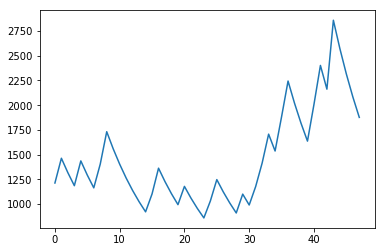

In [188]:
money_history = []
money = 1000
frac = 0.1
total_staked = 0
total_won = 0
for row in merged_spa2.itertuples():
    if row.probtie >= 0.35:
        stake = frac * money
        money -= stake
        total_staked += stake
        if row.result == "D":
            money += stake * row.BbMxD * 0.99
            total_won += stake * row.BbMxD * 0.99
        money_history.append(money)
plt.plot(money_history)
print("money at end £{}".format(money))
print("total matches {}".format(len(money_history)))
print("lowest bank £{}".format(min(money_history)))
print("highest bank £{}".format(max(money_history)))
print("ROI {}%".format(100 * (round((total_won / total_staked) - 1, 2))))
print("Percent of matches bet on {}".format(round(len(money_history) * 100 / len(df_spa2), 2)))